# Distributions Revisited

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random

## Negative Binomial Distribution

The negative binomial distribution describes the probability of getting the $r^{th}$ success (of a binary process) on the $n^{th}$ trial.

Its pdf looks like this:

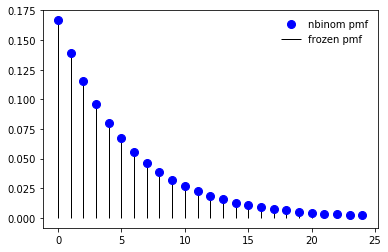

In [31]:
n = 1
p = 1 / 6

fig, ax = plt.subplots(1, 1)
prob = stats.nbinom(n, p)
x = np.arange(stats.nbinom.ppf(0.01, n, p),
              stats.nbinom.ppf(0.99, n, p))
ax.plot(x, stats.nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, prob.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

For example, what are the chances that it takes me twenty rolls of a fair die before finally rolling two 6's?

The equation is given by the following:

$\large P_{negbinom}(n, r, p) = $$\large(n - 1)\choose\large(r - 1)$$\large p^r(1 - p)^{n - r}$.

Let's explain this:

If the $r^{th}$ success is going to come on the $n^{th}$ trial, then how many successes should I have on the first $n - 1$ trials?

How many failures will I have in the first $n - 1$ trials?

So, to answer our example question, we have:

$\large P_{negbinom}(20, 2, 1/6) = $$\large19\choose\large 1$$\large (1/6)^2(5/6)^{18}$

In [1]:
# Let's calculate this here:



In [6]:
# Let's check our math against scipy's!



(Note that the geometric distribution is a special case of the negative binomial distribution.)

There is only a 2% chance that this will happen!

The mean of this distribution is $\large\mu = \frac{r}{p}$ (does this make sense?), <br/>

and the std of this distribution is $\large\sigma = \frac{\sqrt{r(1 - p)}}{p}$

### Your turn!

Suppose I roll a 100-sided die. What are the chances that I roll my 3rd '98' on the 27th roll of the die?

In [5]:
# Your code here!



## Sampling and the Central Limit Theorem

Recall the difference between sample and population. Statisticians (and data scientists!) are often in the position of making predictions about some population based on a sample drawn from that population:

- I interview 100 Washingtonians and take their responses to be representative of state opinions generally.

- I measure the lengths of 200 fish in Puget Sound and speculate about the lengths of _all_ the fish in the Sound.

Question: Are the _statistics_ I calculate on my sample representative of the statistics of the population?

Note: The difference between a sample statistic and the population statistic is called the **sampling error**.

Reflection: What factors might be responsible for a large (or small) sampling error?

Suppose I take many samples and calculate statistics on each. Would _those_ illuminate the population statistics?

The Central Limit Theorem (CLT) says that, under suitable conditions, the sum of independent random variables will converge to a normal distribution in the limit as the number of variables increases infinitely. The CLT will often hold _even when_ the underlying random variables are _not_ themselves normally distributed!

Let's look at some examples:

In [30]:
# Let's look at the means of an exponential distribution.
# We'll use the ```.rvs()``` method of scipy.



In [31]:
# Let's make a histogram. Suppose we choose about 50 bins.



In [7]:
# Now let's try the same thing for binomial random variates.
# We'll use 100 single trials. We can tinker with p.



In [8]:
# Plotting here


In [23]:
# Let's try it for standard deviations of a geometric distribution.



In [27]:
# Plot



In [26]:
# Expected result for std


In [28]:
# Minimum values of a normal distribution?



In [29]:
# Plot



## Confidence Intervals

Because sample statistics are imperfect representations of the true population values, it is often appropriate to state these estimates with **confidence intervals**.

Before proceeding, let's already say a word about how to _interpret_ a confidence interval.

Suppose our Indian correspondent (or David Attenborough) takes several hundred measurements of parrot beak lengths in the Ganges river basin and calculates (correctly!) an average beak length of 9cm. He reports this measure by saying that the 90%-confidence interval is (8.6, 9.4).

This does NOT mean that we should be 90% confident that the true population mean beak length is somewhere between 8.6cm and 9.4cm. Rather, what our correspondent means is that, if we were to conduct the same measuring experiment many times, constructing intervals in the same way, we should expect 90% of those intervals to contain the true population mean.

OK: So how do we construct these intervals?

The confidence interval we construct will depend on the statistics of our sample. It will depend in particular on (i) our sample mean and (ii) our sample size.

Naturally, the confidence interval will be centered on our sample mean. To construct the endpoints we step out from the center with a step size equal to the standard error, $\large\frac{\sigma}{\sqrt{n}}$. The number of steps we take is determined by which level of confidence we want attached to our interval: In particular, we take $z$-many steps, where $z$ is the (two-tailed) z-score that corresponds to our chosen level of confidence.

Let's look at an example:

In [50]:
# A normally distributed variable with a
# population size of 1000

pop = set(stats.norm.rvs(size=1000))

In [54]:
# Let's calculate the population mean.



In [55]:
# And the population standard deviation.



Let's say we take a sample of ten from our population, and that we want an 80%-confidence interval for our estimate of the population mean. The z-score that corresponds to an 80%-confidence interval is:

In [60]:
conf = stats.norm.ppf(0.9) # Why 0.9 here?
conf

1.2815515655446004

### A Visual Interpretation of Confidence Intervals

In [6]:
# Plotting CIs

